# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data.. /cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [13]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
c_data = pd.DataFrame({'City': cities, 'Cloudiness' : "", 'Date': "", 'Humidity' : "", 'Lat' : "",
                              'Lng' : "", 'Max Temp' : "", 'Windspeed': ""})
r_num = 1
set_num = 1

#Setting Base URL for Call
base_url = 'http://api.openweathermap.org/data/2.5/weather?units=imperial&q=' 

for index, row in c_data.iterrows():
    
    query = base_url + row['City'] + '&APPID=' + weather_api_key
    response = requests.get(query).json()
    
    try: 
        print(f'Processing Weather Data for Record {record_number} of Set {set_number} | {response["name"]}')
        
        #Input data into the dataframe
        c_data.loc[index, 'Cloudiness'] = response['clouds']['all']
        c_data.loc[index, 'Date'] = response['dt']
        c_data.loc[index, 'Humidity'] = response['main']['humidity']
        c_data.loc[index, 'Lat'] = response['coord']['lat']
        c_data.loc[index, 'Lng'] = response['coord']['lon']
        c_data.loc[index, 'Max Temp'] = response['main']['temp_max']
        c_data.loc[index, 'Windspeed'] = response['wind']['speed']
        c_data.loc[index, 'Country'] = response['sys']['country']
        
        
        r_num += 1
        
    except (KeyError, IndexError):
        print("City not found....Skipping............")
        
    #API Limit
    if r_num == 101:
        set_num += 1
        r_num = 1
        time.sleep(15)


Processing Weather Data for Record 1092 of Set 1 | New Norfolk
Processing Weather Data for Record 1092 of Set 1 | Port Alfred
Processing Weather Data for Record 1092 of Set 1 | Meulaboh
Processing Weather Data for Record 1092 of Set 1 | Sheltozero
Processing Weather Data for Record 1092 of Set 1 | Ubari
Processing Weather Data for Record 1092 of Set 1 | Dikson
Processing Weather Data for Record 1092 of Set 1 | San Patricio
Processing Weather Data for Record 1092 of Set 1 | Mahrīz
Processing Weather Data for Record 1092 of Set 1 | Nome
Processing Weather Data for Record 1092 of Set 1 | Punta Arenas
Processing Weather Data for Record 1092 of Set 1 | Wau
Processing Weather Data for Record 1092 of Set 1 | Coahuayana Viejo
Processing Weather Data for Record 1092 of Set 1 | Broken Hill
Processing Weather Data for Record 1092 of Set 1 | Atuona
Processing Weather Data for Record 1092 of Set 1 | Rikitea
Processing Weather Data for Record 1092 of Set 1 | Qaqortoq
Processing Weather Data for Reco

Processing Weather Data for Record 1092 of Set 1 | Florianópolis
Processing Weather Data for Record 1092 of Set 1 | Bemidji
Processing Weather Data for Record 1092 of Set 1 | Carutapera
Processing Weather Data for Record 1092 of Set 1 | Hobart
Processing Weather Data for Record 1092 of Set 1 | Japura
Processing Weather Data for Record 1092 of Set 1 | Baykit
Processing Weather Data for Record 1092 of Set 1 | San Miguel
Processing Weather Data for Record 1092 of Set 1 | Kathu
Processing Weather Data for Record 1092 of Set 1 | Linjiang
City not found....Skipping............
Processing Weather Data for Record 1092 of Set 1 | Korla
Processing Weather Data for Record 1092 of Set 1 | Vuktyl
Processing Weather Data for Record 1092 of Set 1 | Kolosovka
City not found....Skipping............
Processing Weather Data for Record 1092 of Set 1 | Pisco
Processing Weather Data for Record 1092 of Set 1 | Ngunguru
Processing Weather Data for Record 1092 of Set 1 | Poso
Processing Weather Data for Record

Processing Weather Data for Record 1092 of Set 1 | Bilma
Processing Weather Data for Record 1092 of Set 1 | Korgen
Processing Weather Data for Record 1092 of Set 1 | Margate
Processing Weather Data for Record 1092 of Set 1 | Konëvo
Processing Weather Data for Record 1092 of Set 1 | El Rosario
Processing Weather Data for Record 1092 of Set 1 | Araceli
Processing Weather Data for Record 1092 of Set 1 | Rodrigues Alves
City not found....Skipping............
Processing Weather Data for Record 1092 of Set 1 | San Cristobal
Processing Weather Data for Record 1092 of Set 1 | Yerbogachën
Processing Weather Data for Record 1092 of Set 1 | Dwārka
Processing Weather Data for Record 1092 of Set 1 | Tazovsky
Processing Weather Data for Record 1092 of Set 1 | Chui
Processing Weather Data for Record 1092 of Set 1 | Auki
City not found....Skipping............
Processing Weather Data for Record 1092 of Set 1 | Chibombo
Processing Weather Data for Record 1092 of Set 1 | Palu
Processing Weather Data for 

Processing Weather Data for Record 1092 of Set 1 | Skibbereen
Processing Weather Data for Record 1092 of Set 1 | Bambanglipuro
Processing Weather Data for Record 1092 of Set 1 | Marystown
Processing Weather Data for Record 1092 of Set 1 | Guerrero Negro
Processing Weather Data for Record 1092 of Set 1 | Navahrudak
Processing Weather Data for Record 1092 of Set 1 | Nantucket
Processing Weather Data for Record 1092 of Set 1 | Suárez
Processing Weather Data for Record 1092 of Set 1 | Cockburn Town
Processing Weather Data for Record 1092 of Set 1 | Timrå
Processing Weather Data for Record 1092 of Set 1 | Shelburne
Processing Weather Data for Record 1092 of Set 1 | Slantsy
Processing Weather Data for Record 1092 of Set 1 | Luanda
Processing Weather Data for Record 1092 of Set 1 | São José de Ribamar
Processing Weather Data for Record 1092 of Set 1 | Arrecife
Processing Weather Data for Record 1092 of Set 1 | Burns Lake
Processing Weather Data for Record 1092 of Set 1 | Tura
Processing Weath

Processing Weather Data for Record 1092 of Set 1 | Arrondissement de Thiers
Processing Weather Data for Record 1092 of Set 1 | Saint-François
Processing Weather Data for Record 1092 of Set 1 | Elizabeth City
Processing Weather Data for Record 1092 of Set 1 | Itoman
Processing Weather Data for Record 1092 of Set 1 | Ciudad Bolivar
Processing Weather Data for Record 1092 of Set 1 | Los Llanos de Aridane
Processing Weather Data for Record 1092 of Set 1 | Kralendijk
Processing Weather Data for Record 1092 of Set 1 | Waipawa
Processing Weather Data for Record 1092 of Set 1 | Kiunga
Processing Weather Data for Record 1092 of Set 1 | Sambava
Processing Weather Data for Record 1092 of Set 1 | Yeppoon
Processing Weather Data for Record 1092 of Set 1 | Seoul
Processing Weather Data for Record 1092 of Set 1 | Balasore
Processing Weather Data for Record 1092 of Set 1 | Redlands
Processing Weather Data for Record 1092 of Set 1 | Darhan
Processing Weather Data for Record 1092 of Set 1 | Turaif
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [22]:
c_data['Max Temp'] = c_data['Max Temp'].replace('', np.nan)
c_data = c_data.dropna()

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [23]:
#  Get the indices of cities that have humidity over 100%.
dd_city = c_data_pd[(c_data_pd['Humidity'] > 100)].index
dd_city

NameError: name 'c_data_pd' is not defined

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0.5, 1.0, ' Latitude vs. Max Temp')

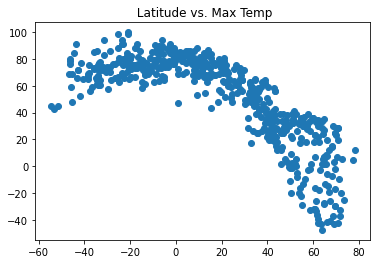

In [24]:
plt.scatter(c_data['Lat'], c_data['Max Temp'], marker ='o')
plt.title (' Latitude vs. Max Temp')

## Latitude vs. Humidity Plot

Text(0.5, 1.0, ' Latitude vs. Max Temp')

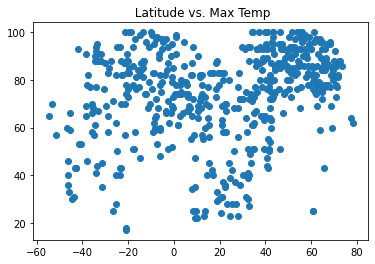

In [25]:
plt.scatter(c_data['Lat'], c_data['Humidity'], marker ='o')
plt.title (' Latitude vs. Max Temp')

## Latitude vs. Cloudiness Plot

Text(0.5, 1.0, ' Latitude vs. Max Temp')

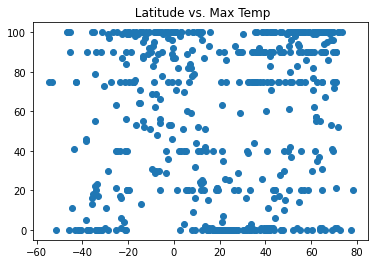

In [27]:
plt.scatter(c_data['Lat'], c_data['Cloudiness'], marker ='o')
plt.title (' Latitude vs. Max Temp')

## Latitude vs. Wind Speed Plot

Text(0.5, 1.0, ' Latitude vs. Max Temp')

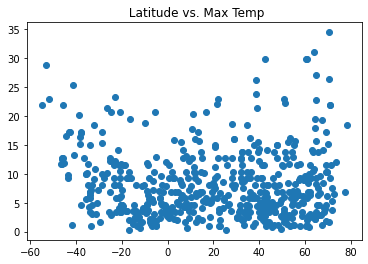

In [28]:
plt.scatter(c_data['Lat'], c_data['Windspeed'], marker ='o')
plt.title (' Latitude vs. Max Temp')

## Linear Regression

In [30]:
n = c_data.loc[c_data['Lat'].astype(float) >=0.0]
s = c_data.loc[c_data['Lat'].astype(float) < 0.0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -1.36x + 90.95
The r-squared is: -0.8517888057284214


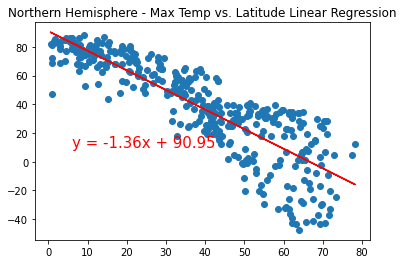

In [32]:
x_values = pd.to_numeric(n['Lat']).astype(float)
y_values = pd.to_numeric(n['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.savefig("../output_data/Northern Hemisphere Lat vs. Max Temp.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.33x + 82.13
The r-squared is: 0.4376143873580193


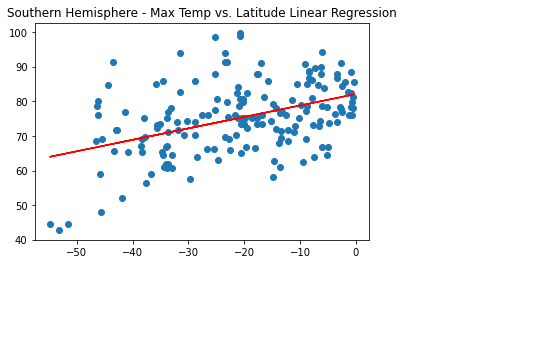

In [36]:
x_values = pd.to_numeric(s['Lat']).astype(float)
y_values = pd.to_numeric(s['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.savefig("../output_data/SouthernHemisphere Lat vs. Max Temp.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.37x + 60.01
The r-squared is: 0.39512466998887436


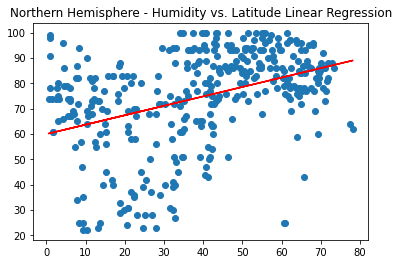

In [37]:
x_values = pd.to_numeric(n['Lat']).astype(float)
y_values = pd.to_numeric(n['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.savefig("../output_data/Northern Hemisphere Lat vs. Humidity.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.45x + 82.13
The r-squared is: 0.32123793615507074


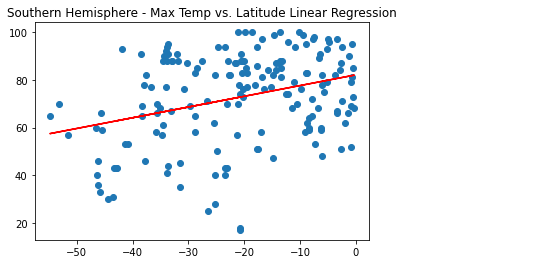

In [38]:
x_values = pd.to_numeric(s['Lat']).astype(float)
y_values = pd.to_numeric(s['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.savefig("../output_data/Southern Hemisphere Lat vs. Humidity.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.46x + 37.49
The r-squared is: 0.23499290391485927


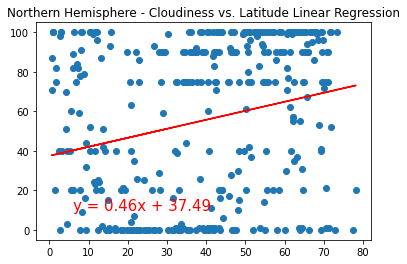

In [40]:
x_values = pd.to_numeric(n['Lat']).astype(float)
y_values = pd.to_numeric(n['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.savefig("../output_data/Northern Hemisphere Lat vs. Cloudiness.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 1.02x + 81.65
The r-squared is: 0.37343998901229924


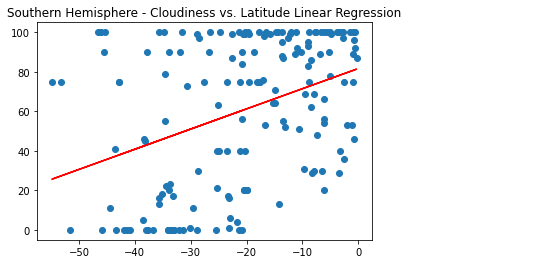

In [41]:
x_values = pd.to_numeric(s['Lat']).astype(float)
y_values = pd.to_numeric(s['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.savefig("../output_data/Southern Hemisphere Lat vs. Cloudiness.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.03x + 7.05
The r-squared is: 0.09385846485251723


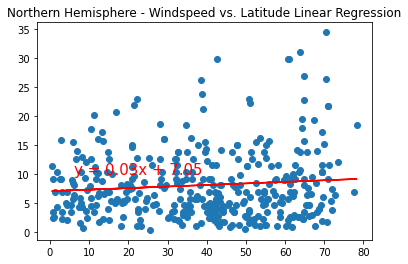

In [42]:
x_values = pd.to_numeric(n['Lat']).astype(float)
y_values = pd.to_numeric(n['Windspeed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Northern Hemisphere - Windspeed vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.savefig("../output_data/Northern Hemisphere Lat vs. Windspeed.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.22x + 3.63
The r-squared is: -0.506220409357056


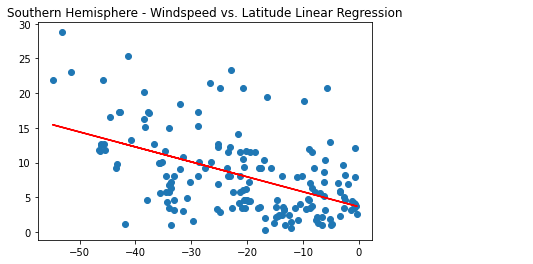

In [43]:
x_values = pd.to_numeric(s['Lat']).astype(float)
y_values = pd.to_numeric(s['Windspeed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Southern Hemisphere - Windspeed vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.savefig("../output_data/Southern Hemisphere Lat vs. Wind Speed.png")
plt.show()